<p style="text-align: right;">Бузин Глеб. Б03-907</p>

---

<h1 style="text-align: center;"> Лабораторная работа 3.3.4 <br> Эффект Холла в полупроводниках </h1>

**Цель**: _измерение подвижности и кони,стран,ии носителей заряда в полупроводниках._
**Оборудование**: _электромагнит с источником питания, амперметр, миллиамперметр, милливеберметр, реостат, цифровой вольтметр, источник питания, образцы легированного германия._

## Теоретическое введение:
Пусть через однородную пластину металла вдоль оси $x$ течет ток $I$. Если эту пластину поместить в магнитное поле, направленное по оси $у$, то между гранями А и Б появляется разность потенциалов. На электрон, движущийся со скоростью $v$ в электромагнитном поле, действует сила Лоренца:

$$
\overrightarrow{F_L} = - e\overrightarrow{E} - e\langle v \rangle \times \overrightarrow{B} 
$$

Под действием этой силы электроиы отклоняются к грани $Б$, на грани $А$ образуется нескомпенсированный положительный заряд. Это приводит к возникновению электрическою поля, направлепного от $А$ к $Б$, которое действует с силой $ F_E = eE_z $. В условиях равновесия $ F_B = F_R => $ приравнивая уравнения найдем ЭДС Холла для металлов

$$ U_AB = - \frac{IB}{nea} = - R_x \frac{IB}{a} $$

Константа $R_x$ называется постоянной Холла

$$ R_x = \frac{1}{ne} $$

В полупроводниках, когда вклад обусловлен и электронами и дырками

$$ R_x = \frac{nb_e^2 - pb_p^2}{e(nb_e + pb_p)^2} $$

### Экспериментальная установка:

![hey](exp.png)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
sns.set()

from sklearn.linear_model import LinearRegression, Lasso, Ridge
%config InlineBackend.figure_format='svg'

## Ход работы:
1. Прокалибруем электромагнит - определим связь между индукцией $В$ магнитного поля в зазоре электромагнита и током $I_M$ через обмотки магнита. Построим график зависимости $В = f(I_M)$.

In [35]:
calib = pd.read_csv('calib.csv')
calib

,I,B
0,0.00,21.7
1,0.25,247.0
2,0.50,509.7
3,0.75,782.0
4,1.00,944.2
5,1.25,1047.9
6,1.60,1085.3


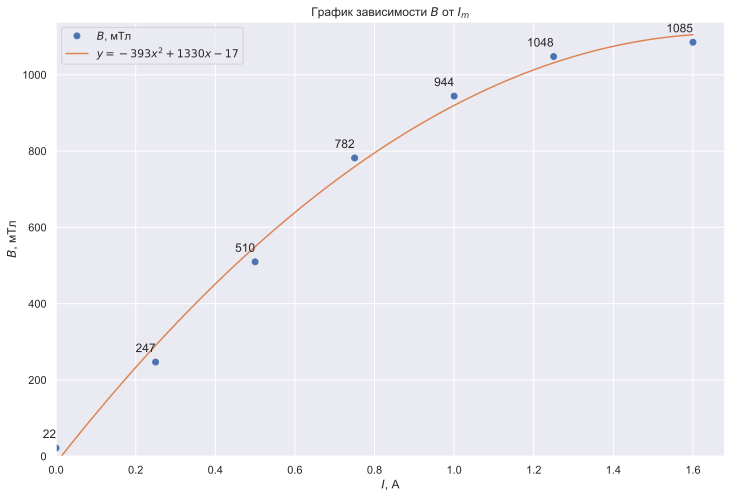

In [36]:
cal = calib.assign(I2=calib['I']**2)
X = cal[['I', 'I2']]
y = cal['B']
reg = LinearRegression().fit(X, y)
calib.plot(x='I', y='B', marker='.', markersize=12, figsize=(12, 8),
           title=r'График зависимости $B$ от $I_m$',
           xlabel=r'$I$, A', ylabel=r'$B$, мТл', xlim=0, ylim=0,
           linewidth=0, label=r'$B$, мТл');

def approx(x):
    return reg.coef_[0]*x + reg.coef_[1]*x*x + reg.intercept_
approx = np.vectorize(approx)
xa = np.linspace(0, 1.6, 100)
ya = approx(xa)
plt.plot(xa, ya, label=f'$y = {round(reg.coef_[1])}x^2 + {round(reg.coef_[0])}x {round(reg.intercept_)}$')
plt.legend()

for x,y in zip(calib['I'], calib['B']):

    label = "{:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='right')

2. Проведем измерения ЭДС Холла. Для каждою тока $I$ определим значение $U_0$, вызванное несовершенствами контактов. Проведем измерения $U_{+34} = f(I_M)$ и $U_{-34} = f(I_M)$. Это необходимо для того, чтобы чтобы избавиться от $U_0$, считая ЭДС Холла не по формуле $\xi_х = U_{34} + U_0$, а из выражения 

$$ 2\xi_х = U_{+34} + U_0 - (U_{-34} + U_0) $$

$$ \xi_х = \frac{U_{+34} - U_{-34}}{2} $$

In [37]:
main = pd.read_csv('main.csv')
df = main/2
df['I'] = df['I']*2
df['B'] = approx(df['I'])
df

,I,B,U0.25,U0.40,U0.52,U0.64,U0.76,U1.00
0,0.16,185.355445,9.0,16.5,15.5,18.0,26.0,32.5
1,0.32,367.964170,16.5,23.0,30.0,37.5,44.5,63.0
2,0.48,530.468034,24.5,35.0,45.0,56.5,67.0,93.0
3,0.64,672.867038,30.5,52.0,58.0,86.5,86.5,114.5
4,0.80,795.161181,38.5,58.5,73.0,89.5,108.0,138.5
5,0.96,897.350463,43.5,64.5,81.0,104.0,123.0,160.5
6,1.12,979.434885,47.5,70.5,90.0,113.5,134.5,174.5
7,1.28,1041.414446,51.0,76.0,96.0,118.5,142.5,186.5
8,1.44,1083.289147,53.0,78.5,101.0,124.0,151.0,196.0


3. Определим коэффициенты
$k(I) = \frac{\Delta \xi}{\Delta B}$ полученных прямых

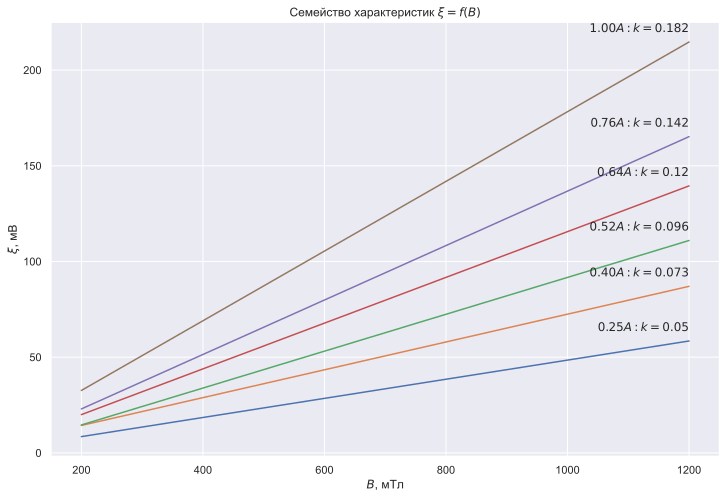

In [38]:
X_B = df['B'].values[:,np.newaxis]
x = np.linspace(200, 1200, 100)
plt.figure(figsize=(12,8))
plt.title(r'Семейство характеристик $\xi = f(B)$')
plt.ylabel(r'$\xi$, мВ')
plt.xlabel(r'$B$, мТл')
k_s = np.empty((2, 6))

for i, col in enumerate(df.columns[2:]):
    y = df[col].values
    regl = LinearRegression().fit(X_B, y)
    k_s[0, i] = float(col[1:])
    k_s[1, i] = regl.coef_[0]
    def line(x):
        return regl.coef_[0]*x + regl.intercept_
    line = np.vectorize(line)
    plt.plot(x, line(x));
    plt.annotate(f'${col[1:]}A: k = {round(regl.coef_[0], 3)}$',
                 (1200, line(1200)),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='right')

4. Построим график $k = f(I)$.

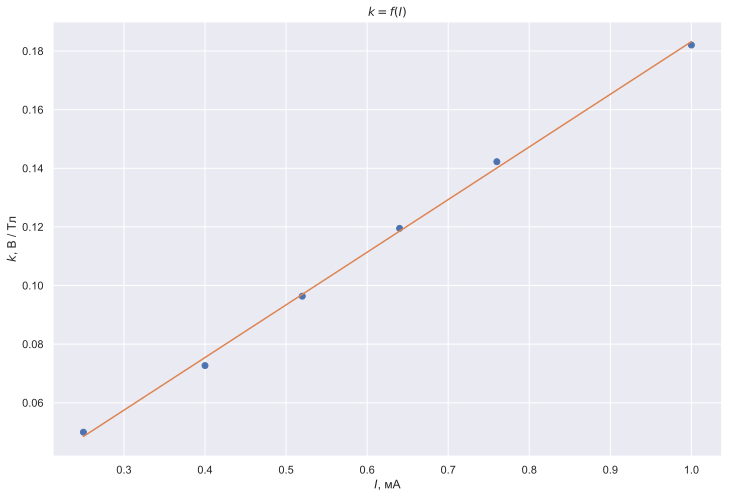

In [39]:
plt.figure(figsize=(12,8))
plt.title(r'$k = f(I)$')
plt.ylabel(r'$k$, В / Тл')
plt.xlabel(r'$I$, мА')
plt.plot(k_s[0], k_s[1], marker='.', markersize=12, linewidth=0);
regl = LinearRegression().fit(k_s[0][:,np.newaxis], k_s[1])
def line(x):
        return regl.coef_[0]*x + regl.intercept_
line = np.vectorize(line)
x = np.linspace(0.25, 1, 100)
plt.plot(x, line(x));

Найдем $tg(\alpha)$

In [40]:
tga = round(regl.coef_[0], 3)
print(r"tg = ", tga)

tg =  0.18


По нему определим величину постоянной Холла: $R_x = a tg(\alpha)$

In [41]:
a = 1
R_x = a * 1e-3 * tga
print('R = ', R_x, ' м^3/Кл')

R =  0.00017999999999999998  м^3/Кл


5. Расчитаем концентрацию $n$ носителей в образце по формуле: $n = \frac{1}{R_x e}$

In [42]:
e = 1.6021766208e-19
n = 1 / (R_x * e)
print('n = ', n)

n =  3.4675050699351434e+22


6. Рассчитаем удельную проводимость $\sigma$ материала образца по формуле $\sigma = \frac{IL_{35}}{U_{35}al}$

In [43]:
I = 1e-3
a = 1e-3
L35 = 5e-3
l = 4e-3
U35 = 1.73e-3
sigma = (I * L35) / (U35 * a * l)
print('sigma = ', sigma, ' А/(В * м)')

sigma =  722.5433526011561  А/(В * м)


По формуле $b = \frac{\sigma}{en}$ находим подвижность носителей в образце

In [44]:
b = (sigma / (e * n)) * 1e4
print('b = ', b, ' см^2 / (В * с)')

b =  1300.5780346820811  см^2 / (В * с)


### Вывод:
Мы эксперименатльно исследовали эффект Холла в образце из германия, являющегося примером полупроводника, нашли для него постоянную Холла. Проводимость в германии имеет дырочный характер.